In [1]:
!pip install do-mpc[full]
# Import do_mpc package:
import do_mpc
from casadi import *
from casadi.tools import *
# Basic helper functions
import numpy as np # linear algebra
import math
#import the matplotlib module for plotting the results
import matplotlib.pyplot as plt

# The step function
def unit_step(time, actuation_time):
    if time >= actuation_time:
        value = 1
    else:
        value = 0
    # return the output
    return value

# The impulse function
def unit_impulse(time, actuation_time, dt):
    return unit_step(time, actuation_time) - unit_step(time, actuation_time+dt)

# The ramp function
def unit_ramp(time, actuation_time):
    if time >= actuation_time:
        value = time - actuation_time
    else:
        value = 0
    # return the output
    return value

# The sinusoidal function
def sin_wave(time, actuation_time, freq, amplitude):
    if time >= actuation_time:
        value = amplitude*math.sin(2*math.pi*freq*(time - actuation_time))
    else:
        value = 0
    # return the output
    return value

def state_space_model(A,B,C,D, x_k, u_k, dt):  
    # calculate the next state
    x_k1 = dt*(np.matmul(A,x_k) + np.matmul(B,u_k) ) + x_k
    # calculate the current outputs
    y = np.matmul(C,x_k) + np.matmul(D,u_k)
    # return the results
    return x_k1, y

def saturate(signal, saturation_level):
    # apply the upper-bound for saturation
    if signal > saturation_level:
        output = saturation_level
    # apply the lower-bound for saturation
    elif signal < -saturation_level:
        output = -saturation_level
    # do not change the signal in other cases
    else:
        output = signal
    return output

def simple_plot(x,y, x_label, y_label):
    plt.plot(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()
    
def plot_states_inputs_2x1(time_values, x_values, ref_values, u_values):
    # create some subplots and display the results
    fig, axs = plt.subplots(2, 1,figsize=(7,7))
    # plot the first state vs time
    fig.tight_layout(pad=5.0)
    # plot the 1st state vs time
    axs[0].plot(time_values, x_values[:,0])
    axs[0].plot(time_values, ref_values)
    axs[0].set_xlabel('time (seconds)')
    axs[0].set_ylabel('position (m)')
    axs[0].grid()
    axs[0].legend(['turtlebot', 'reference'])
    
    # plot the input vs time
    axs[1].plot(time_values, u_values)
    axs[1].set_xlabel('time (seconds)')
    axs[1].set_ylabel('Control input (Velocity: meters/second)')
    axs[1].grid()
    
    
def plot_states_inputs_3x1(time_values, x_values, ref_values, u_values):
    # create some subplots and display the results
    fig, axs = plt.subplots(3, 1,figsize=(7,7))
    # plot the first state vs time
    fig.tight_layout(pad=5.0)
    # plot the 1st state vs time
    axs[0].plot(time_values, x_values[:,0])
    axs[0].plot(time_values, ref_values)
    axs[0].set_xlabel('time (seconds)')
    axs[0].set_ylabel('position (m)')
    axs[0].grid()   
    axs[0].legend(['car', 'reference'])
    # plot the 2nd state vs time
    axs[1].plot(time_values, x_values[:,1])
    axs[1].set_xlabel('time (seconds)')
    axs[1].set_ylabel('v (m/s)')
    axs[1].grid()   
    # plot the input vs time
    axs[2].plot(time_values, u_values)
    axs[2].set_xlabel('time (seconds)')
    axs[2].set_ylabel('Control input (N)')
    axs[2].grid()

  Obtaining dependency information for do-mpc[full] from https://files.pythonhosted.org/packages/d5/70/a8798e0d9a61a31d153166a5fd07a94be1a69ebc8aca6681e9b2e9997c9a/do_mpc-4.6.4-py3-none-any.whl.metadata
  Obtaining dependency information for casadi>=3.6.0 from https://files.pythonhosted.org/packages/b4/b0/1289804327602e892c36f14fa2b4492afbeee8f465a365c8759b03186f1c/casadi-3.6.5-cp310-none-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for asyncua from https://files.pythonhosted.org/packages/f9/23/51633678951e422a314fc97196c113197a3695682b6ac8e79aa30414cc2f/asyncua-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiofiles from https://files.pythonhosted.org/packages/c5/19/5af6804c4cc0fed83f47bff6e413a98a36618e7d40185cd36e69737f3b0e/aiofiles-23.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for aiosqlite from https://files.pythonhosted.org/packages/00/c4/c93eb22025a2de6b83263dfe3d7df2e19138e345bca6f18dba7394120930/aiosqlite-0.

# Section 1

## Planar Motion of Quadrotor

### 10/16/2023

### Alex Scheckells, Zack Glew

### Abstact: In this project we aim to model the dynamics of a quadrotor on an x,y plane. In this model, the thrust and torque are applied to the quadrotor as input and we simulate the x position and velocity, y postion and velocity, and the angular velocity and acceleration. We test the system with different inpust such as to make the quadrotor hover (equilibrium). For each test we provide a plot that shows the change in x and y, given diffrent inputs.

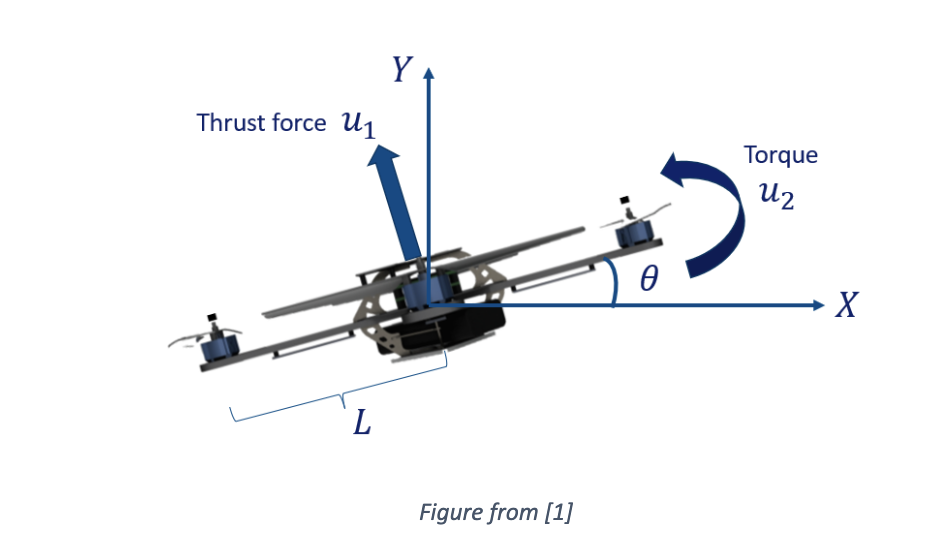

image from Dr.Saeidi Slides

# Section 2

## Dynamics model of the system

Continuous Time Format

$\ddot{x}=\frac{1}{m}\sin(\theta)\cdot u_1$<br>
$\ddot{y}=\frac{1}{m}\cos(\theta)\cdot u_1-g$<br>
$\ddot{\theta} =\frac{1}{I}u_2$<br>

Discrete Time:

$X_{k+1} = \Delta t(\dot{X_k}) + X_k$<br>
$Y_{k+1} = \Delta t (\dot{Y_k}) + Y_k$<br>
$\theta_{k+1} = \Delta t (\dot{\theta_k}) + \theta_k$<br>


${\dot{X}_{k+1}} = \Delta t (\frac{1}{m}\sin(\theta_k)\cdot u_1) + \dot{X_k}$<br>
${\dot{Y}_{k+1}} = \Delta t (\frac{1}{m}\cos(\theta_k)\cdot u_1-g) + \dot{Y_k}$<br>
${\dot{\theta}_{k+1}} = \Delta t (\frac{1}{I}u_2) + \dot{\theta_k}$<br>



Where:

${X_k}$ = X position 

$\dot{X_k}$ = Horizontal Velocity

$\dot{Y_k}$ = Verticle Velocity

$\dot{\theta_k}$ = Angular Acceleration

Parameters:

$u_1$ = Trust force applied to the quadrotor

$u_2$ = Torque applied to the quadrotor (Nm)

m = mass = 0.65 kg 

g = gravity 9.8 $m/s^2$

I = Initial Inertia = 0.013 $\frac{Nms^2}{rad}$, Will change depending on mass. Is the initial intertia before any changes occur.

$\theta$ = Angle relative to x axis

$\Delta t$ = Change in time (sec)

st = start time (sec)

ft = final time (sec)




Example of real life quadrotor.

Typically Quadrotors have 4 motors and sensors to determine the trust needed to do a certain action

The 4 motors allow for the quadrotor to move about a 3d plane freely

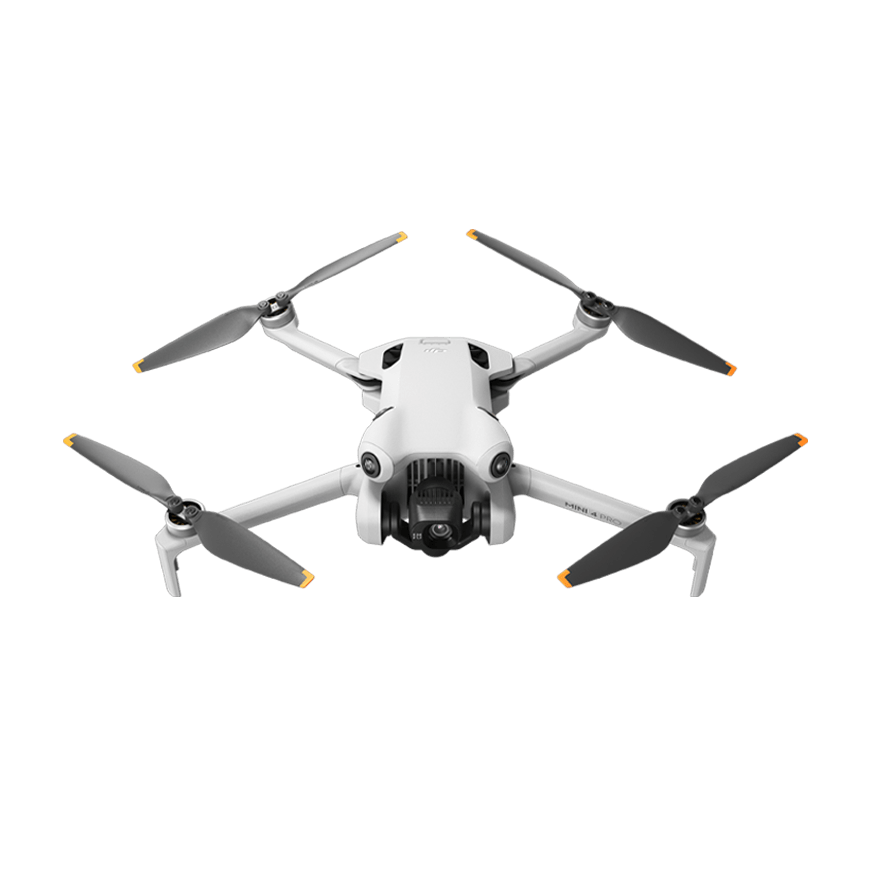
![](https://www.researchgate.net/publication/322808737/figure/fig1/AS:588672491601920@1517361867552/Hyper-DRELIO-Hyperspectral-DRone-for-Environmental-and-LIttoral-Observations-platform.pnghttps://www.researchgate.net/publication/322808737/figure/fig1/AS:588672491601920@1517361867552/Hyper-DRELIO-Hyperspectral-DRone-for-Environmental-and-LIttoral-Observations-platform.png)

image from: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.dji.com%2Fspark&psig=AOvVaw0-01_nyqFf0sT93xUuRa9V&ust=1697596731349000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCNDQi-OG_IEDFQAAAAAdAAAAABAJ

image 2 from:
https://www.researchgate.net/publication/322808737/figure/fig1/AS:588672491601920@1517361867552/Hyper-DRELIO-Hyperspectral-DRone-for-Environmental-and-LIttoral-Observations-platform.pnghttps://www.researchgate.net/publication/322808737/figure/fig1/AS:588672491601920@1517361867552/Hyper-DRELIO-Hyperspectral-DRone-for-Environmental-and-LIttoral-Observations-platform.png

Inputs are sent to the flight controller which then tells the power distribution panels which motors need to spin at what speed

image from: https://www.google.com/url?sa=i&url=https%3A%2F%2Fcfdflowengineering.com%2Fworking-principle-and-components-of-drone%2F&psig=AOvVaw2Zuo0ifLIWWYdl_1wi8Gm6&ust=1697597007697000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCPDy9eaH_IEDFQAAAAAdAAAAABAE



## Examples of applications in the real world

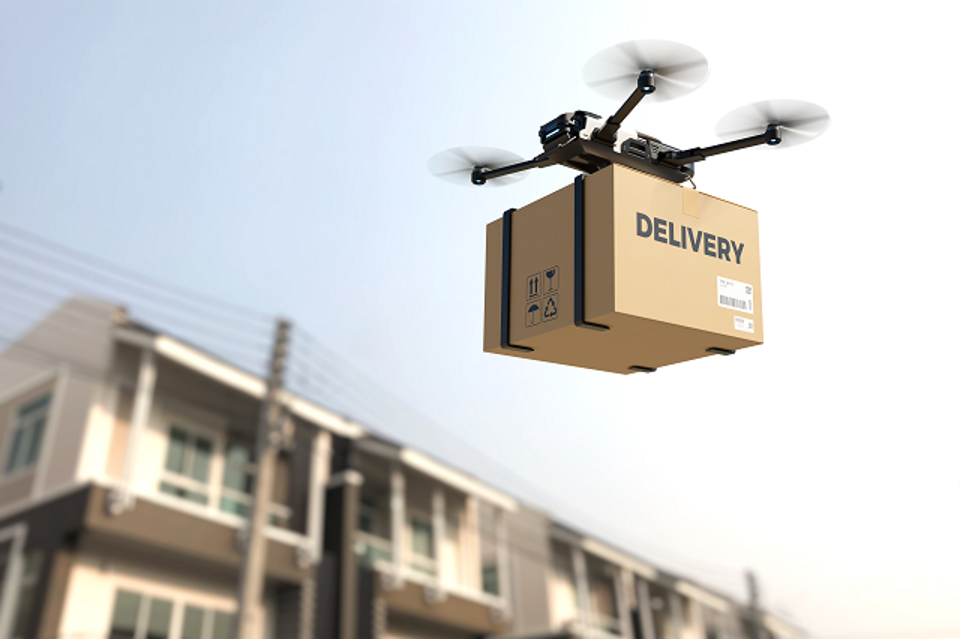
image from : https://imageio.forbes.com/specials-images/imageserve/646fa0bcf01414540503a6f8/Delivery-Drone/960x0.png?format=png&width=960


An example of a real world application of a quadrotor is drone deliveries.

Using a quadrotor as opposed to other types of flying machines is that quadrotors allow for more precise movements due to them being able to adjust their the angle by incresasing the torque produced by each individual motor

# Free Fall

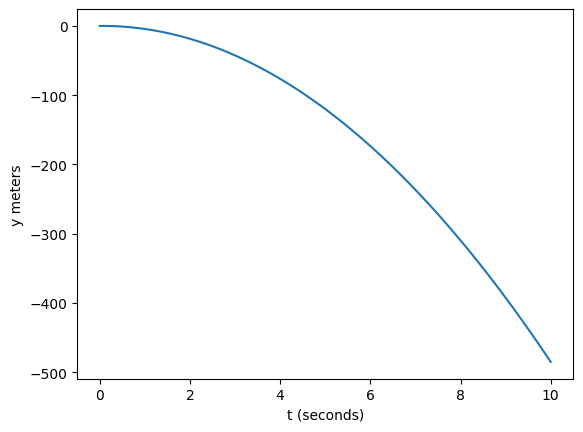

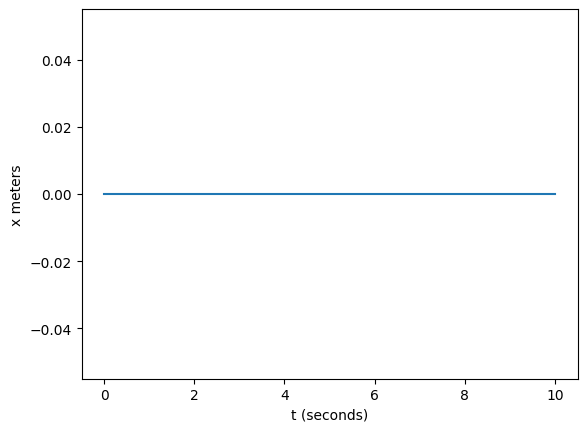

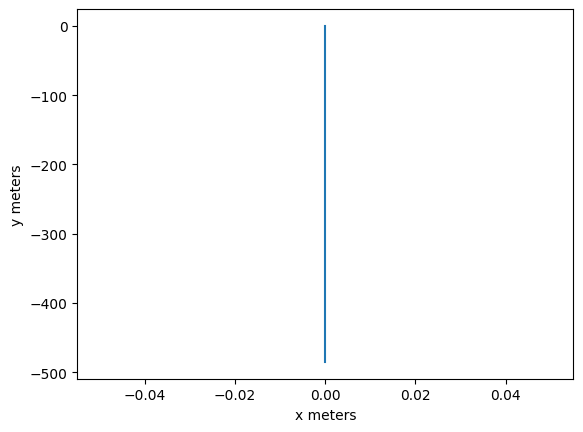

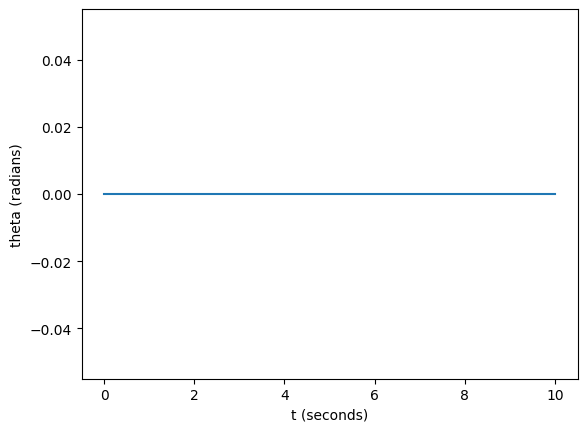

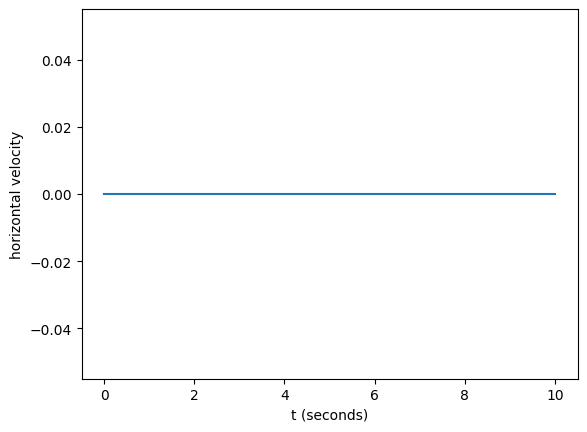

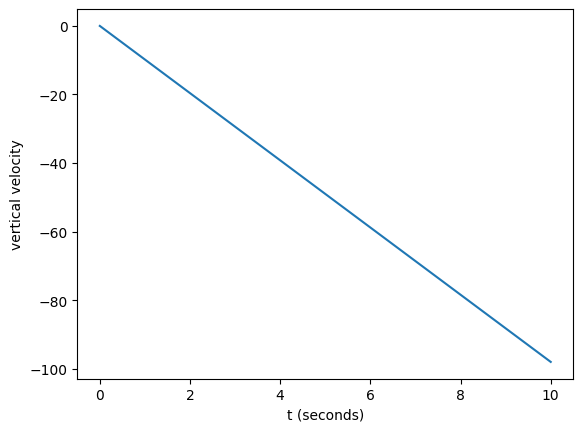

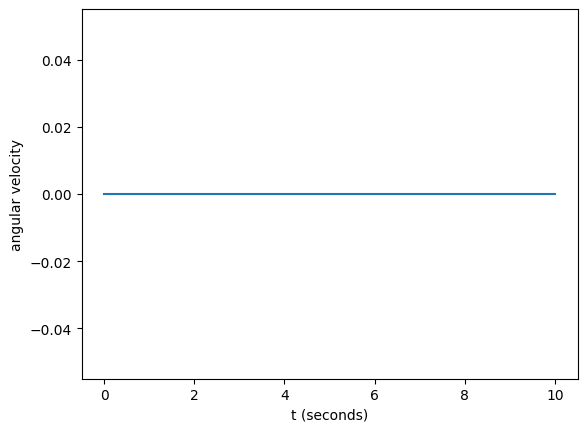

In [2]:

import math
import matplotlib.pyplot as plt

g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)


u1 = 0 #Thrust force (N) Input
u2 = 0 #Torque (Nm)
theta = 0 #Angle (Radians)

xa = 0 #Start X Acceleration
xv = 0 #Start X Velocity
xx = 0 #Start X Position

ya = 0 #Start Y Acceleration
yv = 0 #Start Y Velocity
yx = 0 #Start Y Position

ta = 0 #Start theta Acceleration
tv = 0 #Start theta Velocity
tx = 0 #Start theta Position


t_values = []
xv_values = []
xx_values = []
yv_values = []
yx_values = []
tv_values = []
tx_values = []

st = 0 #Start time (seconds)
ft = 10 #Final time (seconds)
dt = 0.1 #Change in time (seconds)
t = st
tx = theta

while t <= ft:
    
    t_values.append(t)
    
    # X Position
    xx_values.append(xx)
    xv_values.append(xv)
    
    xv_k1 = (-1*((math.sin(tx))/m*u1))*dt + xv
    x_k1 = (xv)*dt + xx
    
    xv = xv_k1
    xx = x_k1
    
    
    # Y Position
    yx_values.append(yx)
    yv_values.append(yv)
    
    yv_k1 = ((math.cos(tx)*u1/m) - g)*dt + yv
    y_k1 = (yv)*dt + yx
    
    yv = yv_k1
    yx = y_k1

    
    # Theta Position
    tx_values.append(tx)
    tv_values.append(tv)
    
    tv_k1 = ((u2/I))*dt + tv
    t_k1 = (tv)*dt + tx
    
    tv = tv_k1
    tx = t_k1

    
    t += dt
    

plt.plot(t_values,yx_values)
plt.xlabel('t (seconds)')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,xx_values)
plt.xlabel('t (seconds)')
plt.ylabel('x meters')
plt.show()

plt.plot(xx_values,yx_values)
plt.xlabel('x meters')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,tx_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians)')
plt.show()

plt.plot(t_values,xv_values)
plt.xlabel('t (seconds)')
plt.ylabel('horizontal velocity')
plt.show()

plt.plot(t_values, yv_values)
plt.xlabel('t (seconds)')
plt.ylabel('vertical velocity')
plt.show()

plt.plot(t_values,tv_values)
plt.xlabel('t (seconds)')
plt.ylabel('angular velocity')
plt.show()






# ***Equilibrium***

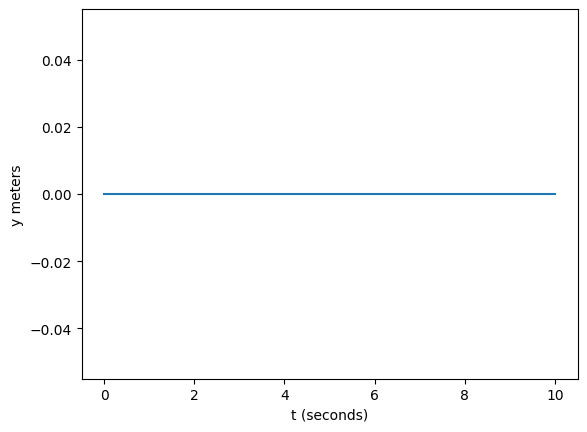

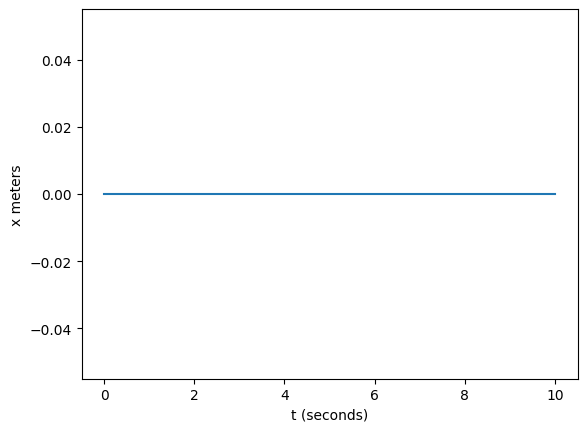

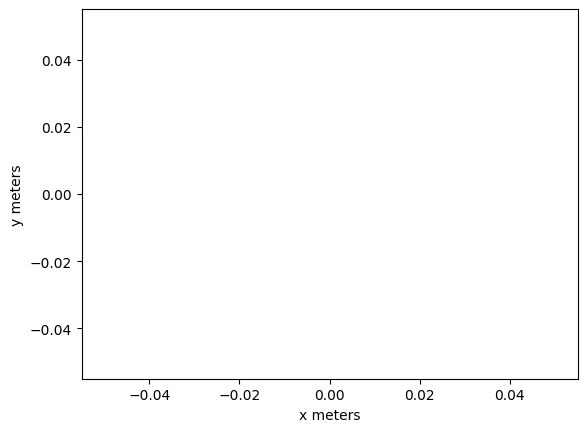

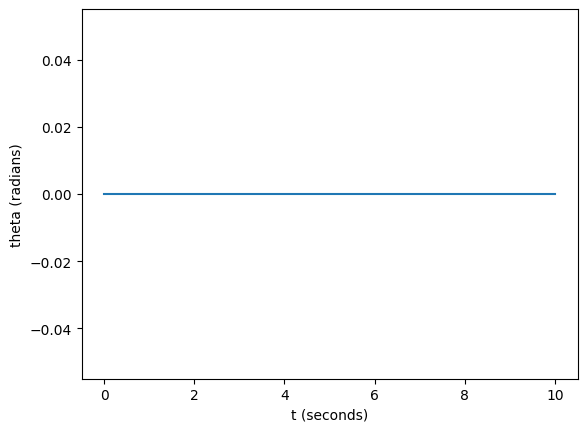

In [3]:

g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)

u1 = 6.37 #Thrust force (N) Input
u2 = 0 #Torque (Nm)
theta = 0 #Angle (Radians)

xa = 0 #Start X Acceleration
xv = 0 #Start X Velocity
xx = 0 #Start X Position

ya = 0 #Start Y Acceleration
yv = 0 #Start Y Velocity
yx = 0 #Start Y Position

ta = 0 #Start theta Acceleration
tv = 0 #Start theta Velocity
tx = 0 #Start theta Position

t_values = []
xv_values = []
xx_values = []
yv_values = []
yx_values = []
tv_values = []
tx_values = []

st = 0 #Start time (seconds)
ft = 10 #Final time (seconds)
dt = 0.1 #Change in time (seconds)

t = st
tx = theta

while t <= ft:
    
    t_values.append(t)
    
    # X Position
    xx_values.append(xx)
    xv_values.append(xv)
    
    xv_k1 = (-1*((math.sin(tx))/m*u1))*dt + xv
    x_k1 = (xv)*dt + xx
    
    xv = xv_k1
    xx = x_k1
    
    
    # Y Position
    yx_values.append(yx)
    yv_values.append(yv)
    
    yv_k1 = ((math.cos(tx)*u1/m) - g)*dt + yv
    y_k1 = (yv)*dt + yx
    
    yv = yv_k1
    yx = y_k1

    
    # Theta Position
    tx_values.append(tx)
    tv_values.append(tv)
    
    tv_k1 = ((u2/I))*dt + tv
    t_k1 = (tv)*dt + tx
    
    tv = tv_k1
    tx = t_k1

    
    t += dt
    

plt.plot(t_values,yx_values)
plt.xlabel('t (seconds)')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,xx_values)
plt.xlabel('t (seconds)')
plt.ylabel('x meters')
plt.show()

plt.plot(xx_values,yv_values)
plt.xlabel('x meters')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,tv_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians)')
plt.show()

# Horizontal Motion

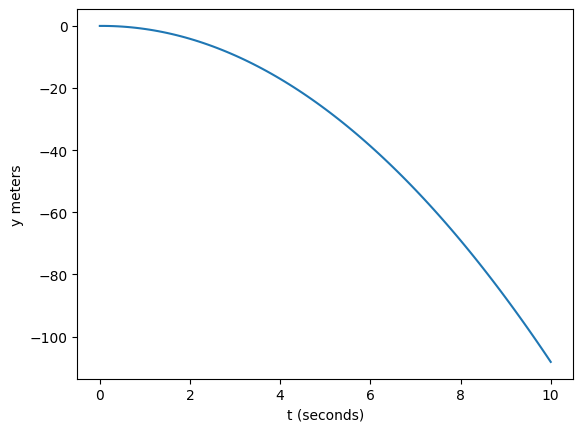

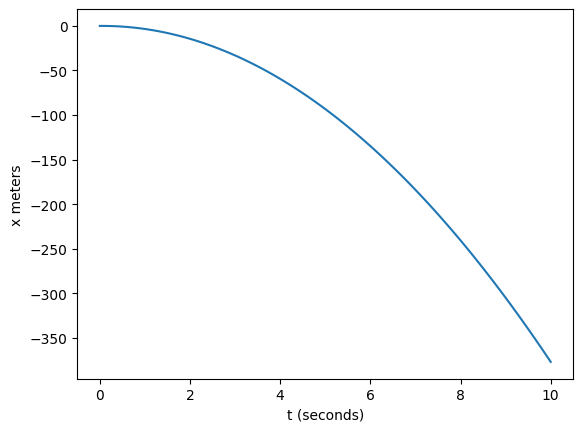

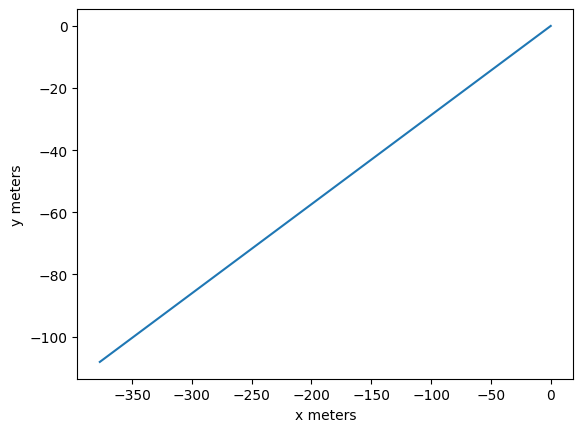

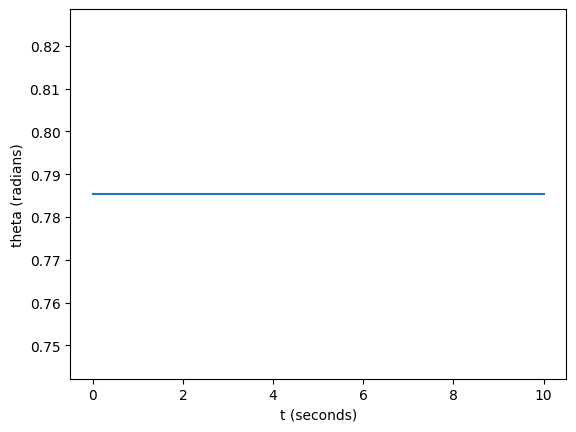

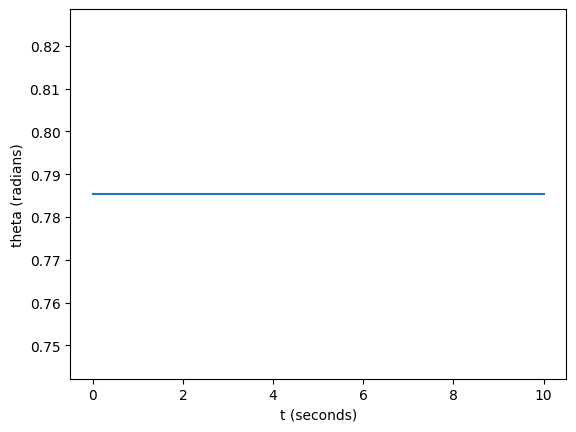

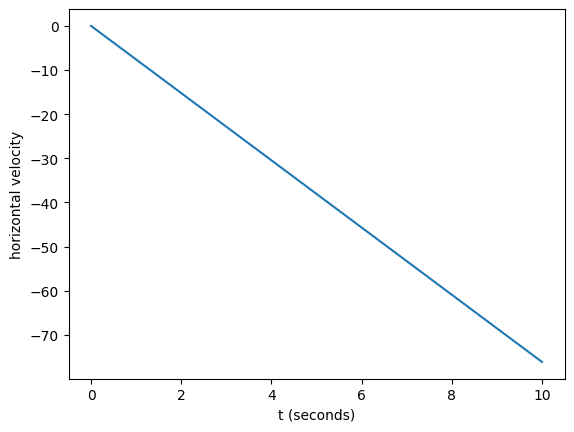

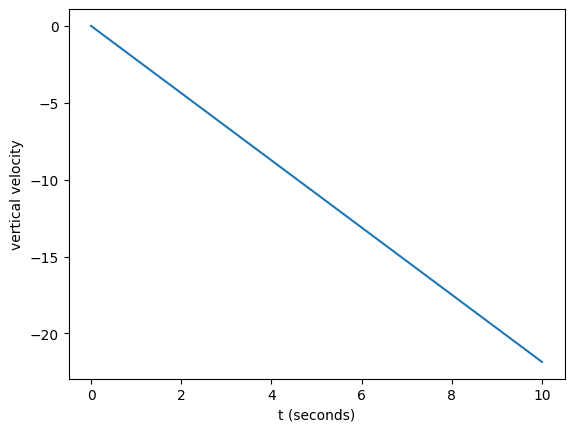

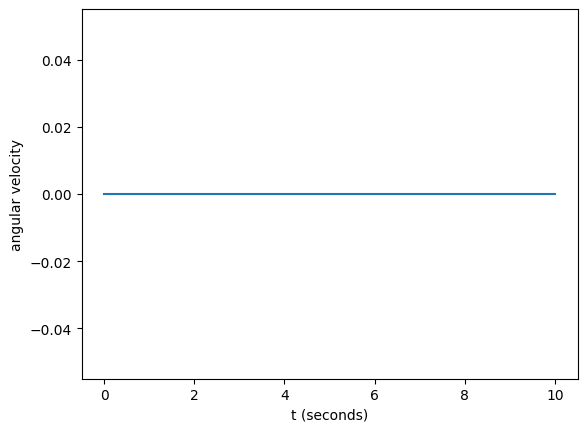

In [4]:
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)


u1 = 7 #Thrust force (N) Input
u2 = 0 #Torque (Nm)
theta = math.pi/4 #Angle (Radians)

xa = 0 #Start X Acceleration
xv = 0 #Start X Velocity
xx = 0 #Start X Position

ya = 0 #Start Y Acceleration
yv = 0 #Start Y Velocity
yx = 0 #Start Y Position

ta = 0 #Start theta Acceleration
tv = 0 #Start theta Velocity
tx = 0 #Start theta Position

t_values = []
xv_values = []
xx_values = []
yv_values = []
yx_values = []
tv_values = []
tx_values = []

st = 0 #Start time (seconds)
ft = 10 #Final time (seconds)
dt = 0.1 #Change in time (seconds)

t = st
tx = theta

while t <= ft:
    
    t_values.append(t)
    
    # X Position
    xx_values.append(xx)
    xv_values.append(xv)
    
    xv_k1 = (-1*((math.sin(tx))/m*u1))*dt + xv
    x_k1 = (xv)*dt + xx
    
    xv = xv_k1
    xx = x_k1
    
    
    # Y Position
    yx_values.append(yx)
    yv_values.append(yv)
    
    yv_k1 = ((math.cos(tx)*u1/m) - g)*dt + yv
    y_k1 = (yv)*dt + yx
    
    yv = yv_k1
    yx = y_k1

    
    # Theta Position
    tx_values.append(tx)
    tv_values.append(tv)
    
    tv_k1 = ((u2/I))*dt + tv
    t_k1 = (tv)*dt + tx
    
    tv = tv_k1
    tx = t_k1

    
    t += dt
    

plt.plot(t_values,yx_values)
plt.xlabel('t (seconds)')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,xx_values)
plt.xlabel('t (seconds)')
plt.ylabel('x meters')
plt.show()

plt.plot(xx_values,yx_values)
plt.xlabel('x meters')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,tx_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians)')
plt.show()

plt.plot(t_values,tx_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians)')
plt.show()

plt.plot(t_values,xv_values)
plt.xlabel('t (seconds)')
plt.ylabel('horizontal velocity')
plt.show()

plt.plot(t_values, yv_values)
plt.xlabel('t (seconds)')
plt.ylabel('vertical velocity')
plt.show()

plt.plot(t_values,tv_values)
plt.xlabel('t (seconds)')
plt.ylabel('angular velocity')
plt.show()

# Adding Torque

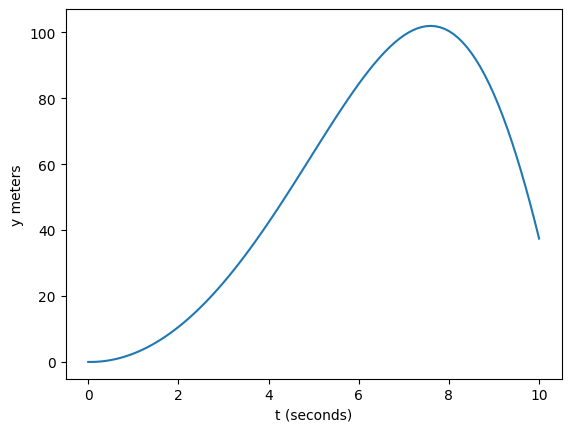

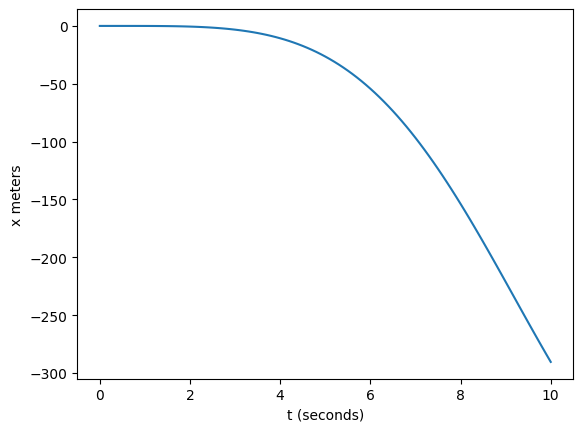

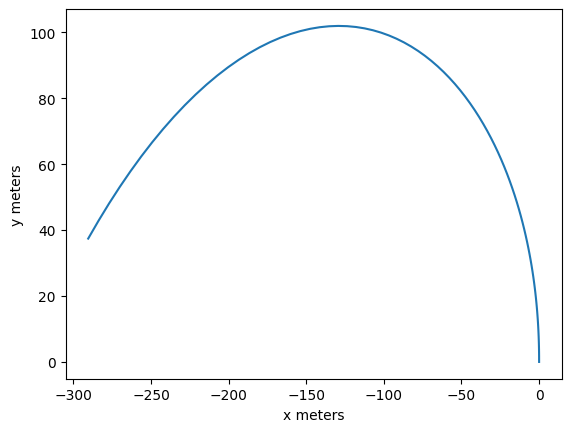

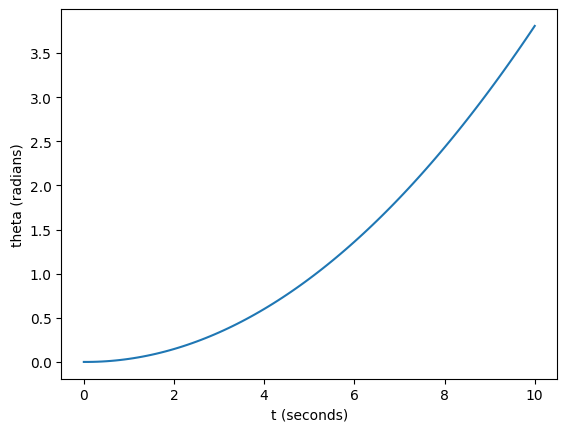

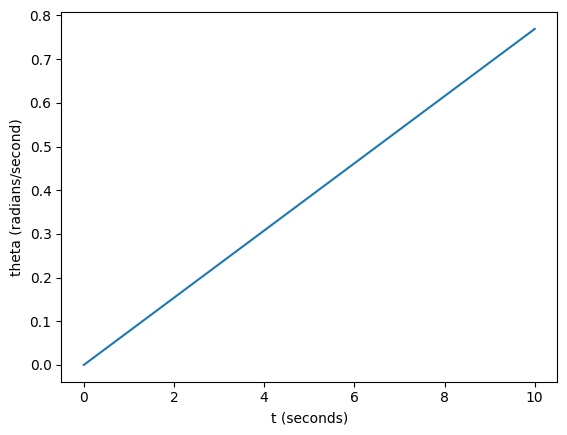

In [5]:
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)


u1 = 10 #Thrust force (N) Input
u2 = 0.001 #Torque (Nm)
theta = 0 #Angle (Radians)

xa = 0 #Start X Acceleration
xv = 0 #Start X Velocity
xx = 0 #Start X Position

ya = 0 #Start Y Acceleration
yv = 0 #Start Y Velocity
yx = 0 #Start Y Position

ta = 0 #Start theta Acceleration
tv = 0 #Start theta Velocity
tx = 0 #Start theta Position

t_values = []
xv_values = []
xx_values = []
yv_values = []
yx_values = []
tv_values = []
tx_values = []

st = 0 #Start time (seconds)
ft = 10 #Final time (seconds)
dt = 0.1 #Change in time (seconds)

t = st
tx = theta

while t <= ft:
    
    t_values.append(t)
    
    # X Position
    xx_values.append(xx)
    xv_values.append(xv)
    
    xv_k1 = (-1*((math.sin(tx))/m*u1))*dt + xv
    x_k1 = (xv)*dt + xx
    
    xv = xv_k1
    xx = x_k1
    
    
    # Y Position
    yx_values.append(yx)
    yv_values.append(yv)
    
    yv_k1 = ((math.cos(tx)*u1/m) - g)*dt + yv
    y_k1 = (yv)*dt + yx
    
    yv = yv_k1
    yx = y_k1

    
    # Theta Position
    tx_values.append(tx)
    tv_values.append(tv)
    
    tv_k1 = ((u2/I))*dt + tv
    t_k1 = (tv)*dt + tx
    
    tv = tv_k1
    tx = t_k1

    
    t += dt
    

plt.plot(t_values,yx_values)
plt.xlabel('t (seconds)')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,xx_values)
plt.xlabel('t (seconds)')
plt.ylabel('x meters')
plt.show()

plt.plot(xx_values,yx_values)
plt.xlabel('x meters')
plt.ylabel('y meters')
plt.show()

plt.plot(t_values,tx_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians)')
plt.show()


plt.plot(t_values,tv_values)
plt.xlabel('t (seconds)')
plt.ylabel('theta (radians/second)')
plt.show()

# Using PID controller to reach positive desired values

Ess x position (m): -0.11096885676990453
Percentage of overshoot (x position): 1.14%
Peak time: 5.92 seconds

Ess y position (m): 0.015515019925441464
Percentage of overshoot (y position): -0.16%
Peak time: 10.01 seconds



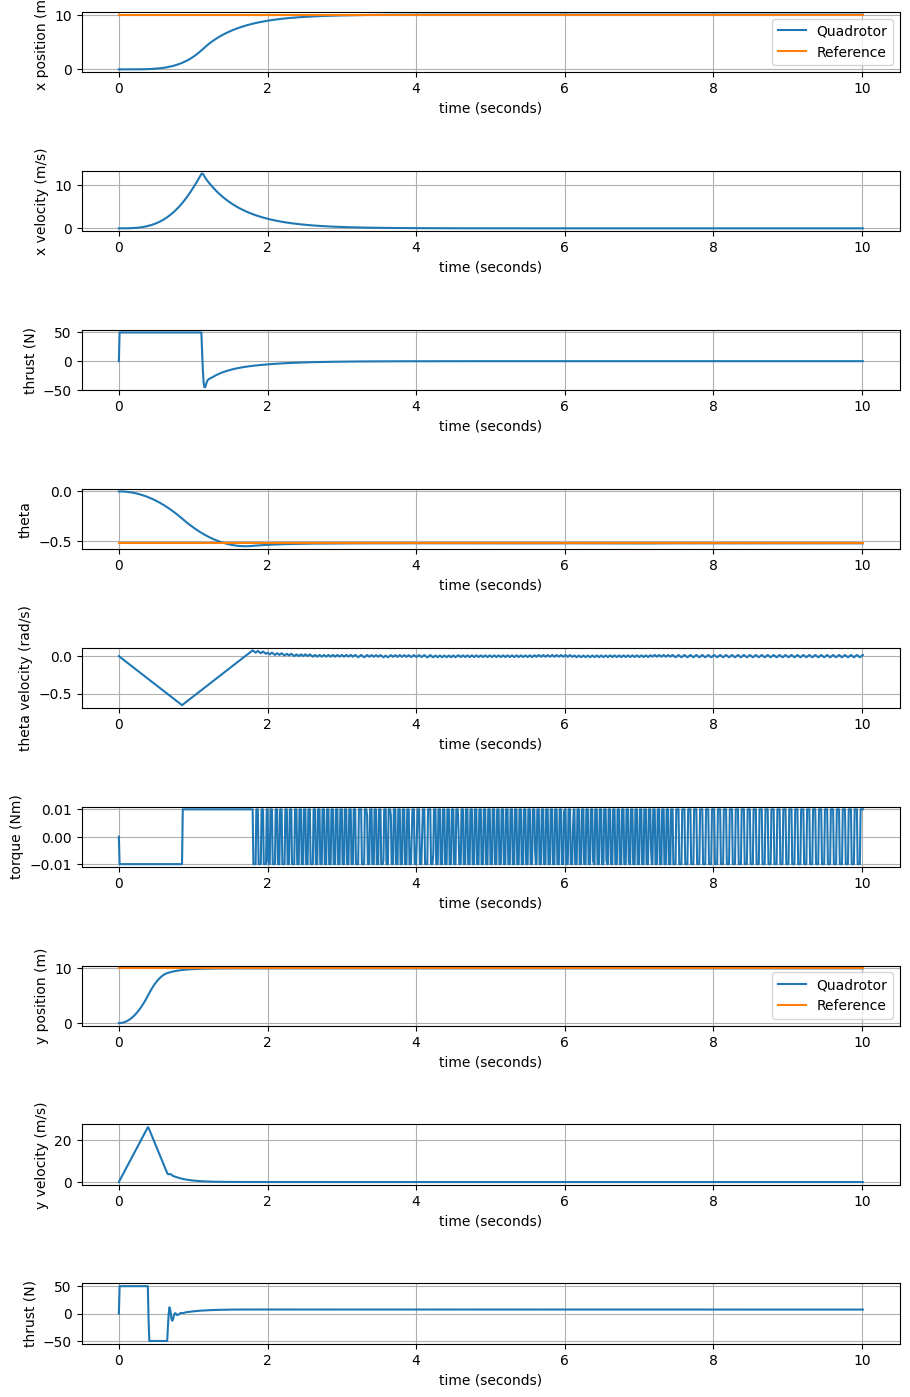

In [6]:
# setting up the numerical solution parameters
g = 9.8 # gravity (m/s/s)
m = 0.65 # mass (kg)
I = 0.013 # moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0 # meters
xdot_0 = 0 # meters/second

theta_0 = 0 # radians
thetadot_0 = 0 # radians/second

u_0 = 0
u2_0 = 0

# states
y_d = 10 # positive desired y position
x_d = 10 # positive desired x position
theta_d = -1*math.pi / 6 # positive desired theta position

t_0 = 0 # seconds
t_f = 10 # seconds
dt = 0.01 # delta t = 0.01 second

# matrices for tracking states
y_values = np.array([[y_0]])
ydot_values = np.array([[ydot_0]])
y_ref = np.array([[y_d]])

x_values = np.array([[x_0]])
xdot_values = np.array([[xdot_0]])
ref_values = np.array([[x_d]])

theta_values = np.array([[theta_0]])
thetadot_values = np.array([[thetadot_0]])
theta_ref = np.array([[theta_d]])

time_values = np.array([[t_0]])

u_values = np.array([[u_0]])
u2_values = np.array([[u2_0]])
uy_values = np.array([[u_0]])

# initialize the solver
x_k = x_0
theta_k = theta_0
y_k = y_0

ydot_k = ydot_0
xdot_k = xdot_0
thetadot_k = thetadot_0

u_k = u_0
u2_k = u_0
uy_k = u_0

t = t_0

e1_prev = 0
e1_int = 0 

K1_p = 115 # P control gain
K1_d = 60 # D control gain
K1_i = 1 # I control gain
    
e2_prev = 0
e2_int = 0

K2_p = 150 # P control gain
K2_d = 60 # D control gain
K2_i = 1 # I control gain
    
e3_prev = 0
e3_int = 0 

K3_p = 200 # P control gain
K3_d = 40 # D control gain
K3_i = 1 # I control gain
    
force_max = 50
torque_max = .01

# simulate the system
while t < t_f:
    e1_k = x_d - x_k #distance between current position and final position (Estimated steady state error)
    e1_dot = (e1_k-e1_prev)/dt #deriviative control to improve overshoot
    e1_prev = e1_k #update e_prev to the current error for next loop
    e1_int += e1_k*dt #calculate initiial error
    force = K1_p*e1_k + K1_i*e1_int + K1_d*e1_dot #implement PID controller
    
    e2_k = theta_d - theta_k #distance between current position and final position (Estimated steady state error)
    e2_dot = (e2_k-e2_prev)/dt #deriviative control to improve overshoot
    e2_prev = e2_k #update e_prev to the current error for next loop
    e2_int += e2_k*dt #calculate initiial error
    torque = K2_p*e2_k + K2_i*e2_int + K2_d*e2_dot #implement PID controller
    
    e3_k = y_d - y_k #distance between current position and final position (Estimated steady state error)
    e3_dot = (e3_k-e3_prev)/dt #deriviative control to improve overshoot
    e3_prev = e3_k #update e_prev to the current error for next loop
    e3_int += e3_k*dt #calculate initiial error
    forcey = K3_p*e3_k + K3_i*e3_int + K3_d*e3_dot #implement PID controller
    
    # dynamic model
    force = saturate(force, force_max)
    forcey = saturate(forcey, force_max)
    torque = saturate(torque, torque_max)
    
    u_k = force
    x_k1 = xdot_k*dt + x_k
    xdot_k1 = (-1*((math.sin(theta_k))/m*u_k))*dt + xdot_k
    
    uy_k = forcey
    y_k1 = ydot_k*dt + y_k
    ydot_k1 = ((((math.cos(theta_k)*uy_k)/m) - g))*dt + ydot_k
    
    u2_k = torque
    theta_k1 = thetadot_k*dt + theta_k
    thetadot_k1 = (u2_k/I)*dt + thetadot_k
    
    # update the simulation time stamp
    t += dt
    
    # update the arrays
    theta_values = np.append(theta_values, np.array([[theta_k1]]))
    thetadot_values = np.append(thetadot_values, np.array([[thetadot_k1]]))
    theta_ref = np.append(theta_ref, np.array([[theta_d]]))
    
    x_values = np.append(x_values, np.array([[x_k1]]),axis = 0)
    xdot_values = np.append(xdot_values, np.array([[xdot_k1]]),axis = 0)
    ref_values= np.append(ref_values, np.array([[x_d]]),axis = 0)
    
    y_values = np.append(y_values, np.array([[y_k1]]))
    ydot_values = np.append(ydot_values, np.array([[ydot_k1]]))
    y_ref = np.append(y_ref, np.array([[y_d]]),axis = 0)
    
    u_values = np.append(u_values, np.array([[u_k]]),axis = 0)
    u2_values = np.append(u2_values, np.array([[u2_k]]),axis = 0)
    uy_values = np.append(uy_values, np.array([[uy_k]]),axis = 0)
    
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    
    # set up the loop for the next iteration
    theta_k = theta_k1
    thetadot_k = thetadot_k1
    
    x_k = x_k1
    xdot_k = xdot_k1
    
    y_k = y_k1
    ydot_k = ydot_k1

# create some subplots and display the results
fig, axs = plt.subplots(9, 1,figsize=(10,15))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# error of x position
e_ssx = x_d - x_k
print('Ess x position (m):',e_ssx)
# estimate the overshoot
OS = (np.max(x_values)-x_d)/x_d*100
print('Percentage of overshoot (x position):',format(OS,'.2f'),'\b%')
# estimate the peak time
tp = np.argmax(x_values)*dt
print('Peak time:',tp,'seconds\n')

# error of y position
e_ssy = y_d - y_k
print('Ess y position (m):',e_ssy)
# estimate the overshoot
OS = (np.max(y_values)-y_d)/y_d*100
print('Percentage of overshoot (y position):',format(OS,'.2f'),'\b%')
# estimate the peak time
tp = np.argmax(y_values)*dt
print('Peak time:',tp,'seconds\n')

# PID Controller 1 (x)
# plot x position vs time
axs[0].plot(time_values, x_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

# plot x velocity vs time
axs[1].plot(time_values, xdot_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x velocity (m/s)')
axs[1].grid()   

# plot u1 (thrust) vs time (x)
axs[2].plot(time_values, u_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()

# PID Controller 2 (theta)
# plot theta position vs time
axs[3].plot(time_values, theta_values)
axs[3].plot(time_values, theta_ref)
axs[3].set_xlabel('time (seconds)')
axs[3].set_ylabel('theta')
axs[3].grid()

# plot theta velocity vs time
axs[4].plot(time_values, thetadot_values)
axs[4].set_xlabel('time (seconds)')
axs[4].set_ylabel('theta velocity (rad/s)')
axs[4].grid()   

# plot the u2 (torque) vs time
axs[5].plot(time_values, u2_values)
axs[5].set_xlabel('time (seconds)')
axs[5].set_ylabel('torque (Nm)')
axs[5].grid()

# PID Controller 3 (y position)
axs[6].plot(time_values, y_values)
axs[6].plot(time_values, y_ref)
axs[6].set_xlabel('time (seconds)')
axs[6].set_ylabel('y position (m)')
axs[6].grid()   
axs[6].legend(['Quadrotor', 'Reference'])

axs[7].plot(time_values, ydot_values)
axs[7].set_xlabel('time (seconds)')
axs[7].set_ylabel('y velocity (m/s)')
axs[7].grid()

# plot the u1 (thrust) vs time (y)
axs[8].plot(time_values, uy_values)
axs[8].set_xlabel('time (seconds)')
axs[8].set_ylabel('thrust (N)')
axs[8].grid()


# Using PID controller to reach negative desired values

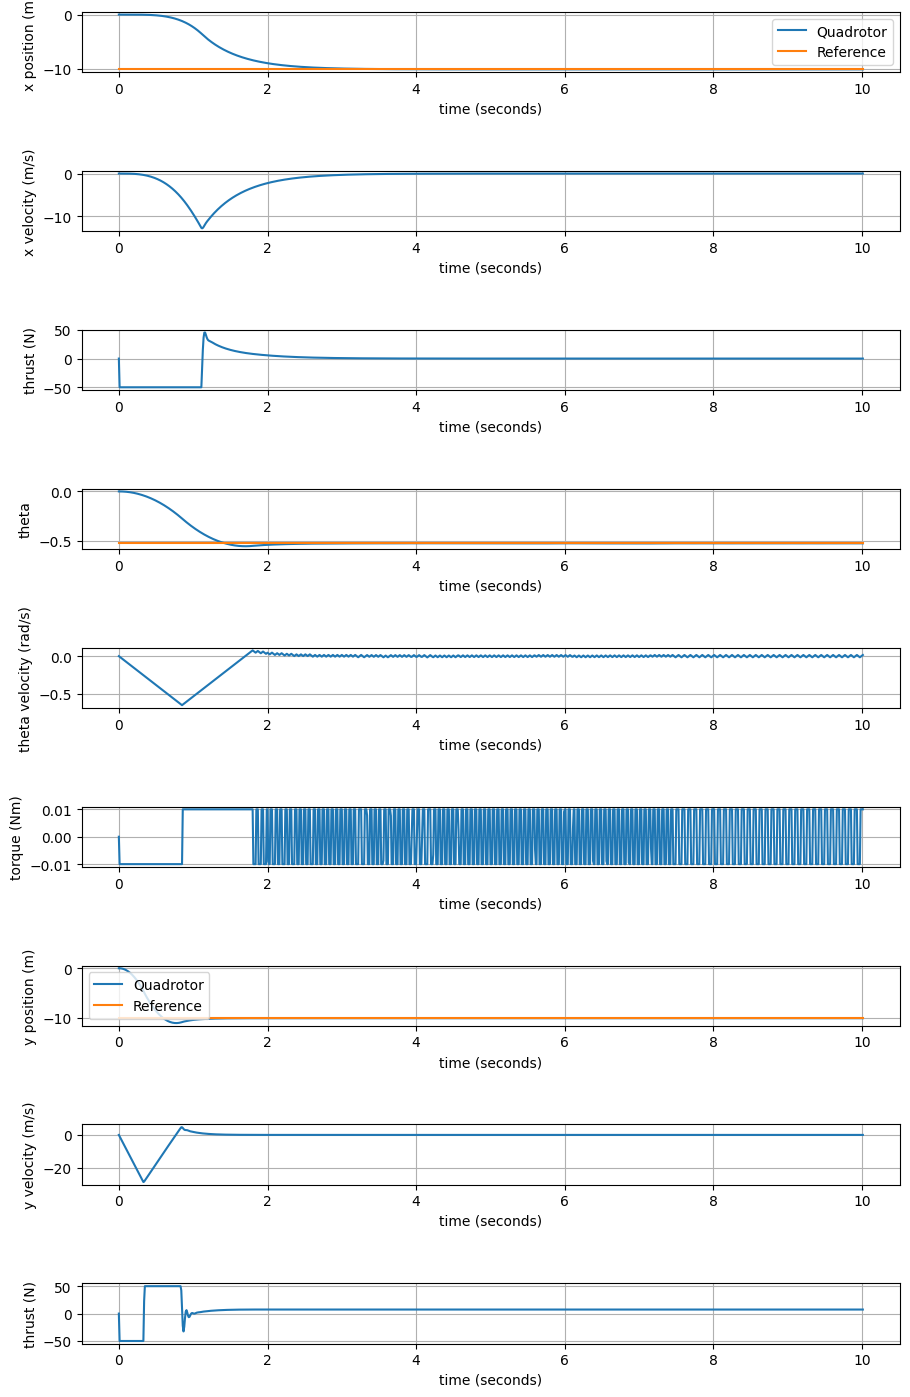

In [7]:
# setting up the numerical solution parameters
g = 9.8 # gravity (m/s/s)
m = 0.65 # mass (kg)
I = 0.013 # moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0 # meters
xdot_0 = 0 # meters/second

theta_0 = 0 # radians
thetadot_0 = 0 # radians/second

u_0 = 0
u2_0 = 0

# states
y_d = -10 # negative desired y position
x_d = -10 # negative desired x position
theta_d = -1*math.pi / 6 # negative desired theta position

t_0 = 0 # seconds
t_f = 10 # seconds
dt = 0.01 # delta t = 0.01 second

# matrices for tracking states
y_values = np.array([[y_0]])
ydot_values = np.array([[ydot_0]])
y_ref = np.array([[y_d]])

x_values = np.array([[x_0]])
xdot_values = np.array([[xdot_0]])
ref_values = np.array([[x_d]])

theta_values = np.array([[theta_0]])
thetadot_values = np.array([[thetadot_0]])
theta_ref = np.array([[theta_d]])

time_values = np.array([[t_0]])

u_values = np.array([[u_0]])
u2_values = np.array([[u2_0]])
uy_values = np.array([[u_0]])

# initialize the solver
x_k = x_0
theta_k = theta_0
y_k = y_0

ydot_k = ydot_0
xdot_k = xdot_0
thetadot_k = thetadot_0

u_k = u_0
u2_k = u_0
uy_k = u_0

t = t_0

e1_prev = 0
e1_int = 0 

K1_p = 115 # P control gain
K1_d = 60 # D control gain
K1_i = 1 # I control gain
    
e2_prev = 0
e2_int = 0

K2_p = 150 # P control gain
K2_d = 60 # D control gain
K2_i = 1 # I control gain
    
e3_prev = 0
e3_int = 0 

K3_p = 200 # P control gain
K3_d = 40 # D control gain
K3_i = 1 # I control gain
    
force_max = 50
torque_max = .01

# simulate the system
while t < t_f:
    e1_k = x_d - x_k #distance between current position and final position (Estimated steady state error)
    e1_dot = (e1_k-e1_prev)/dt #deriviative control to improve overshoot
    e1_prev = e1_k #update e_prev to the current error for next loop
    e1_int += e1_k*dt #calculate initiial error
    force = K1_p*e1_k + K1_i*e1_int + K1_d*e1_dot #implement PID controller
    
    e2_k = theta_d - theta_k #distance between current position and final position (Estimated steady state error)
    e2_dot = (e2_k-e2_prev)/dt #deriviative control to improve overshoot
    e2_prev = e2_k #update e_prev to the current error for next loop
    e2_int += e2_k*dt #calculate initiial error
    torque = K2_p*e2_k + K2_i*e2_int + K2_d*e2_dot #implement PID controller
    
    e3_k = y_d - y_k #distance between current position and final position (Estimated steady state error)
    e3_dot = (e3_k-e3_prev)/dt #deriviative control to improve overshoot
    e3_prev = e3_k #update e_prev to the current error for next loop
    e3_int += e3_k*dt #calculate initiial error
    forcey = K3_p*e3_k + K3_i*e3_int + K3_d*e3_dot #implement PID controller
    
    # dynamic model
    force = saturate(force, force_max)
    forcey = saturate(forcey, force_max)
    torque = saturate(torque, torque_max)
    
    u_k = force
    x_k1 = xdot_k*dt + x_k
    xdot_k1 = (-1*((math.sin(theta_k))/m*u_k))*dt + xdot_k
    
    uy_k = forcey
    y_k1 = ydot_k*dt + y_k
    ydot_k1 = ((((math.cos(theta_k)*uy_k)/m) - g))*dt + ydot_k
    
    u2_k = torque
    theta_k1 = thetadot_k*dt + theta_k
    thetadot_k1 = (u2_k/I)*dt + thetadot_k
    
    # update the simulation time stamp
    t += dt
    
    # update the arrays
    theta_values = np.append(theta_values, np.array([[theta_k1]]))
    thetadot_values = np.append(thetadot_values, np.array([[thetadot_k1]]))
    theta_ref = np.append(theta_ref, np.array([[theta_d]]))
    
    x_values = np.append(x_values, np.array([[x_k1]]),axis = 0)
    xdot_values = np.append(xdot_values, np.array([[xdot_k1]]),axis = 0)
    ref_values= np.append(ref_values, np.array([[x_d]]),axis = 0)
    
    y_values = np.append(y_values, np.array([[y_k1]]))
    ydot_values = np.append(ydot_values, np.array([[ydot_k1]]))
    y_ref = np.append(y_ref, np.array([[y_d]]),axis = 0)
    
    u_values = np.append(u_values, np.array([[u_k]]),axis = 0)
    u2_values = np.append(u2_values, np.array([[u2_k]]),axis = 0)
    uy_values = np.append(uy_values, np.array([[uy_k]]),axis = 0)
    
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    
    # set up the loop for the next iteration
    theta_k = theta_k1
    thetadot_k = thetadot_k1
    
    x_k = x_k1
    xdot_k = xdot_k1
    
    y_k = y_k1
    ydot_k = ydot_k1

# create some subplots and display the results
fig, axs = plt.subplots(9, 1,figsize=(10, 15))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# PID Controller 1 (x)
# plot x position vs time
axs[0].plot(time_values, x_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

# plot x velocity vs time
axs[1].plot(time_values, xdot_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x velocity (m/s)')
axs[1].grid()   

# plot u1 (thrust) vs time (x)
axs[2].plot(time_values, u_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()

# PID Controller 2 (theta)
# plot theta position vs time
axs[3].plot(time_values, theta_values)
axs[3].plot(time_values, theta_ref)
axs[3].set_xlabel('time (seconds)')
axs[3].set_ylabel('theta')
axs[3].grid()

# plot theta velocity vs time
axs[4].plot(time_values, thetadot_values)
axs[4].set_xlabel('time (seconds)')
axs[4].set_ylabel('theta velocity (rad/s)')
axs[4].grid()   

# plot the u2 (torque) vs time
axs[5].plot(time_values, u2_values)
axs[5].set_xlabel('time (seconds)')
axs[5].set_ylabel('torque (Nm)')
axs[5].grid()

# PID Controller 3 (y position)
axs[6].plot(time_values, y_values)
axs[6].plot(time_values, y_ref)
axs[6].set_xlabel('time (seconds)')
axs[6].set_ylabel('y position (m)')
axs[6].grid()   
axs[6].legend(['Quadrotor', 'Reference'])

axs[7].plot(time_values, ydot_values)
axs[7].set_xlabel('time (seconds)')
axs[7].set_ylabel('y velocity (m/s)')
axs[7].grid()

# plot the u1 (thrust) vs time (y)
axs[8].plot(time_values, uy_values)
axs[8].set_xlabel('time (seconds)')
axs[8].set_ylabel('thrust (N)')
axs[8].grid()


# Using MPC to reach positive Y value

Model defined!
MPC solver defined!
y steady-state error (m): 1.1655252336595368e-06


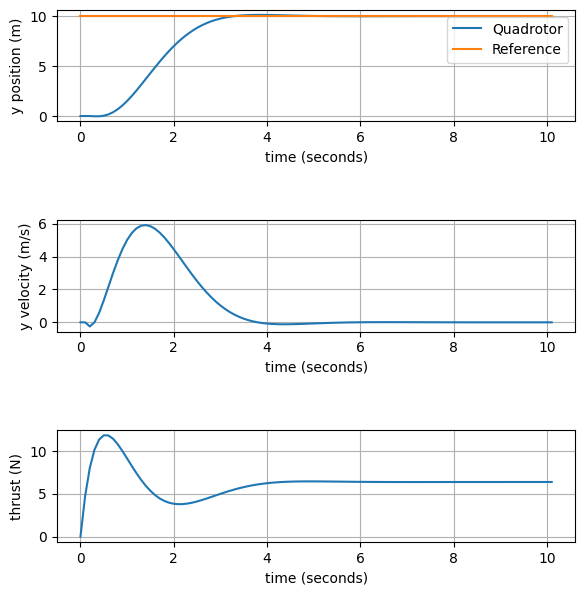

In [8]:
# setting up the numerical solution parameters
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0
xdot_0 = 0

theta_0 = 0
thetadot_0 = 0

thrust_max = 50

dt = 0.1

thrust_0 = 0

y_d = 10

t_0 = 0

model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

# define the states
y_pos = model.set_variable(var_type='_x', var_name='y_pos', shape=(1,1))
y_vel = model.set_variable(var_type='_x', var_name='y_vel', shape = (1,1))
thrust = model.set_variable(var_type='_u', var_name = 'thrust')

# include the dynamics in the model
model.set_rhs('y_vel', (((math.cos(0) * thrust) / m) - g) * dt + y_vel)
model.set_rhs("y_pos", y_vel * dt + y_pos)

# weights for the cost functions  
model.set_expression(
        expr_name="lagrange_term", expr = 0.00001 * thrust**2
)
# reach the final destinatioin (x_d)
model.set_expression(
    expr_name="meyer_term", expr= 200*(y_d - y_pos) ** 2 + 200*y_vel**2
)
# finish the setup
model.setup()
print('Model defined!')

# define the MPC solver
mpc = do_mpc.controller.MPC(model)
mpc.settings.n_horizon = 20 # predict the next N steps
mpc.settings.t_step = dt # sample time

# add the control goals to the solver
lterm = model.aux["lagrange_term"]
mterm = model.aux["meyer_term"]
mpc.set_objective(lterm=lterm, mterm=mterm)

# for smoothing the inputs
mpc.set_rterm(thrust = 5) 
mpc.scaling['_x', 'y_pos'] = 1
mpc.scaling['_x', 'y_vel'] = 1

# lower and upper bounds for the input
mpc.bounds["lower", "_u", "thrust"] = -thrust_max
mpc.bounds["upper", "_u", "thrust"] = thrust_max

# supress the calculation outputs!
surpress_ipopt = {'ipopt.print_level':0, 'ipopt.sb': 'yes', 'print_time':0}
mpc.set_param(nlpsol_opts = surpress_ipopt)

# finish the setup
mpc.setup()
print('MPC solver defined!')

# initialize the independent and dependent variable lists
time_values = np.array([[t_0]])
y_values = np.array([[y_0]])
ref_values = np.array([[y_d]])
u_values = np.array([[thrust_0]])
vel_values = np.array([[ydot_0]])

# initialize the solver
y_k = np.array([[y_0, ydot_0]]).T
y_k1 = np.array([[0, 0]]).T
t = t_0
t_f = 10

# simulate the dynamics
while t < t_f:    
    # set up the solver for the current iteration
    mpc.x0 = y_k # where we start
    mpc.set_initial_guess() # some initial guess
    u_opt = mpc.make_step(y_k) # solve the optimal control problem
    u_k = u_opt[0][0] # extract the first optimal input and apply it
    
    # update the states x_{k+1}
    y_k1 = np.array([[(y_k[1][0])*dt + y_k[0][0], ((math.cos(0)*u_k / m) - g)*dt + y_k[1][0]]]).T
    
    # update the simulation time stamp
    t += dt
    
    # update the lists
    y_values = np.append(y_values, np.array([[y_k[0][0]]]),axis = 0)
    ref_values = np.append(ref_values, np.array([[y_d]]),axis = 0)
    u_values = np.append(u_values, np.array([[u_k]]),axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    vel_values = np.append(vel_values, np.array([[y_k[1][0]]]), axis = 0)
                                                 
    # set up the loop for the next iteration
    y_k = np.array([[y_k1[0][0], y_k1[1][0]]]).T                         
                                                 
# DO NOT CHANGE THE FOLLOWING
# estimate the steady-state error
e_ss = y_d - y_k[0][0]
print('y steady-state error (m):',e_ss)

# create some subplots and display the results
fig, axs = plt.subplots(3, 1,figsize=(7,7))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# plot the y position vs time
axs[0].plot(time_values, y_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('y position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

axs[1].plot(time_values, vel_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('y velocity (m/s)')
axs[1].grid()

# plot the thrust vs time
axs[2].plot(time_values, u_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()


# Using MPC to reach negative Y value

Model defined!
MPC solver defined!
y steady-state error (m): 6.921432778028702e-07


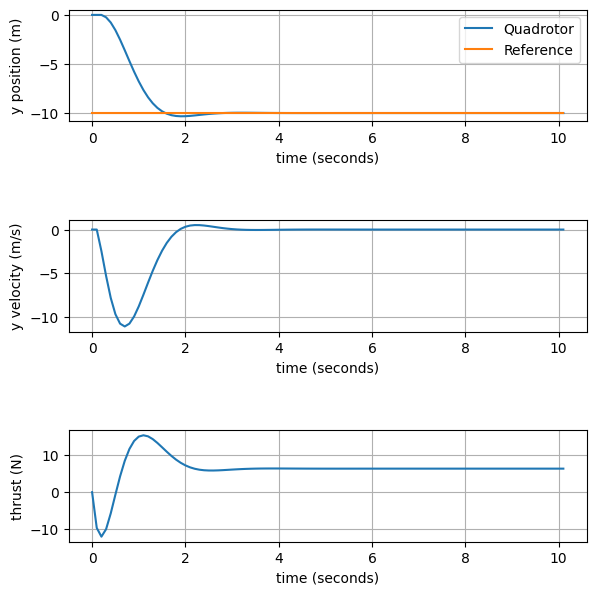

In [9]:
# setting up the numerical solution parameters
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0
xdot_0 = 0

theta_0 = 0
thetadot_0 = 0

thrust_max = 50

dt = 0.1

thrust_0 = 0

y_d = -10

t_0 = 0

model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

# define the states
y_pos = model.set_variable(var_type='_x', var_name='y_pos', shape=(1,1))
y_vel = model.set_variable(var_type='_x', var_name='y_vel', shape = (1,1))
thrust = model.set_variable(var_type='_u', var_name = 'thrust')

# include the dynamics in the model
model.set_rhs('y_vel', (((math.cos(0) * thrust) / m) - g) * dt + y_vel)
model.set_rhs("y_pos", y_vel * dt + y_pos)

# weights for the cost functions  
model.set_expression(
        expr_name="lagrange_term", expr = 0.00001 * thrust**2
)
# reach the final destinatioin (x_d)
model.set_expression(
    expr_name="meyer_term", expr= 200*(y_d - y_pos) ** 2 + 200*y_vel**2
)
# finish the setup
model.setup()
print('Model defined!')

# define the MPC solver
mpc = do_mpc.controller.MPC(model)
mpc.settings.n_horizon = 5 # predict the next N steps
mpc.settings.t_step = dt # sample time

# add the control goals to the solver
lterm = model.aux["lagrange_term"]
mterm = model.aux["meyer_term"]
mpc.set_objective(lterm=lterm, mterm=mterm)

# for smoothing the inputs
mpc.set_rterm(thrust = 5) 
mpc.scaling['_x', 'y_pos'] = 1
mpc.scaling['_x', 'y_vel'] = 1

# lower and upper bounds for the input
mpc.bounds["lower", "_u", "thrust"] = -thrust_max
mpc.bounds["upper", "_u", "thrust"] = thrust_max

# supress the calculation outputs!
surpress_ipopt = {'ipopt.print_level':0, 'ipopt.sb': 'yes', 'print_time':0}
mpc.set_param(nlpsol_opts = surpress_ipopt)

# finish the setup
mpc.setup()
print('MPC solver defined!')

# initialize the independent and dependent variable lists
time_values = np.array([[t_0]])
y_values = np.array([[y_0]])
ref_values = np.array([[y_d]])
u_values = np.array([[thrust_0]])
vel_values = np.array([[ydot_0]])

# initialize the solver
y_k = np.array([[y_0, ydot_0]]).T
y_k1 = np.array([[0, 0]]).T
t = t_0
t_f = 10

# simulate the dynamics
while t < t_f:    
    # set up the solver for the current iteration
    mpc.x0 = y_k # where we start
    mpc.set_initial_guess() # some initial guess
    u_opt = mpc.make_step(y_k) # solve the optimal control problem
    u_k = u_opt[0][0] # extract the first optimal input and apply it
    
    # update the states x_{k+1}
    y_k1 = np.array([[(y_k[1][0])*dt + y_k[0][0], ((math.cos(0)*u_k / m) - g)*dt + y_k[1][0]]]).T
    
    # update the simulation time stamp
    t += dt
    
    # update the lists
    y_values = np.append(y_values, np.array([[y_k[0][0]]]),axis = 0)
    ref_values = np.append(ref_values, np.array([[y_d]]),axis = 0)
    u_values = np.append(u_values, np.array([[u_k]]),axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    vel_values = np.append(vel_values, np.array([[y_k[1][0]]]), axis = 0)
                                                 
    # set up the loop for the next iteration
    y_k = np.array([[y_k1[0][0], y_k1[1][0]]]).T                         
                                                 
# DO NOT CHANGE THE FOLLOWING
# estimate the steady-state error
e_ss = y_d - y_k[0][0]
print('y steady-state error (m):',e_ss)

# create some subplots and display the results
fig, axs = plt.subplots(3, 1,figsize=(7,7))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# plot the y position vs time
axs[0].plot(time_values, y_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('y position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

axs[1].plot(time_values, vel_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('y velocity (m/s)')
axs[1].grid()

# plot the thrust vs time
axs[2].plot(time_values, u_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()


# Using MPC to reach positive X value

MPC trying to reach desired position of 100 meters vertically (just fly straight up and stay there).

Model defined!
MPC solver defined!
x steady-state error (m): 2.48090143983859e-07


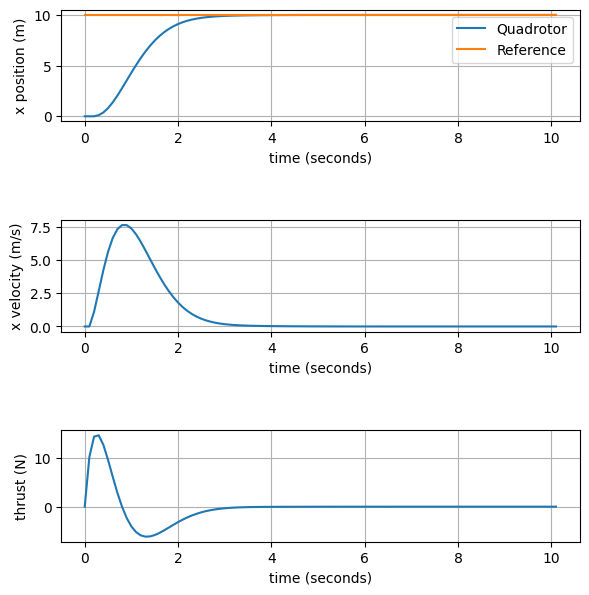

In [10]:
# setting up the numerical solution parameters
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0
xdot_0 = 0

theta_0 = 0
thetadot_0 = 0

thrust_max = 50

dt = 0.1

thrust_0 = 0
torque_0 = 0

x_d = 10

t_0 = 0

model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

# define the states
x_pos = model.set_variable(var_type='_x', var_name='x_pos', shape=(1,1))
x_vel = model.set_variable(var_type='_x', var_name='x_vel', shape = (1,1))
thrust = model.set_variable(var_type='_u', var_name = 'thrust')

# include the dynamics in the model
model.set_rhs('x_vel', ((-1*(math.sin(-math.pi/4) * thrust) / m) * dt + x_vel))
model.set_rhs("x_pos", x_vel * dt + x_pos)


# setup the control goals
# weights for the cost functions
     

# avoid large force (let's say we want to minimize energy consumption)
model.set_expression(
        expr_name="lagrange_term", expr = 0.00001 * thrust**2
)
# reach the final destinatioin (x_d)
model.set_expression(
    expr_name="meyer_term", expr= 200*(x_d - x_pos) ** 2 + 200*x_vel**2
)
# finish the setup
model.setup()
print('Model defined!')

# define the MPC solver
mpc = do_mpc.controller.MPC(model)
mpc.settings.n_horizon = 5 # predict the next N steps
mpc.settings.t_step = dt # sample time

# add the control goals to the solver
lterm = model.aux["lagrange_term"]
mterm = model.aux["meyer_term"]
mpc.set_objective(lterm=lterm, mterm=mterm)

# for smoothing the inputs
mpc.set_rterm(thrust = 5) 
mpc.scaling['_x', 'x_pos'] = 1
mpc.scaling['_x', 'x_vel'] = 10

# lower and upper bounds for the input
mpc.bounds["lower", "_u", "thrust"] = -thrust_max
mpc.bounds["upper", "_u", "thrust"] = thrust_max

# supress the calculation outputs!
surpress_ipopt = {'ipopt.print_level':0, 'ipopt.sb': 'yes', 'print_time':0}
mpc.set_param(nlpsol_opts = surpress_ipopt)

# finish the setup
mpc.setup()
print('MPC solver defined!')

# initialize the independent and dependent variable lists
time_values = np.array([[t_0]])
x_values = np.array([[x_0]])
ref_values = np.array([[x_d]])
u1_values = np.array([[thrust_0]])
u2_values = np.array([[torque_0]])
vel_values = np.array([[xdot_0]])

# initialize the solver
s_k = np.array([[x_0, xdot_0]]).T
s_k1 = np.array([[0, 0, 0 ,0]]).T
t = t_0
t_f = 10

# simulate the dynamics
while t < t_f:    
    # TODO: calculate v_k for the current step
    # set up the solver for the current iteration
    mpc.x0 = s_k # where we start
    mpc.set_initial_guess() # some initial guess
    u_opt = mpc.make_step(s_k) # solve the optimal control problem
    u_k = u_opt[0][0] # extract the first optimal input and apply it

    s_k1 = np.array([[(s_k[1][0])*dt + s_k[0][0], (-1*(math.sin(-math.pi/4)*u_k) / m)*dt + s_k[1][0]]]).T
    
    # update the simulation time stamp
    t += dt
    
    # update the lists
    x_values = np.append(x_values, np.array([[s_k[0][0]]]),axis = 0)
    ref_values = np.append(ref_values, np.array([[x_d]]),axis = 0)
    u1_values = np.append(u1_values, np.array([[u_k]]),axis = 0)
    
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    vel_values = np.append(vel_values, np.array([[s_k[1][0]]]), axis = 0)
                                                 
    # set up the loop for the next iteration
    s_k = np.array([[s_k1[0][0], s_k1[1][0]]]).T                         
                                                 
# DO NOT CHANGE THE FOLLOWING
# estimate the steady-state error
e_ss = x_d - s_k[0][0]
print('x steady-state error (m):',e_ss)

# create some subplots and display the results
fig, axs = plt.subplots(3, 1,figsize=(7,7))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# plot the x position vs time
axs[0].plot(time_values, x_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

# plot the x velocity vs time
axs[1].plot(time_values, vel_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x velocity (m/s)')
axs[1].grid()

# plot the input vs time
axs[2].plot(time_values, u1_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()

# Using MPC to reach negative X values

Model defined!
MPC solver defined!
x steady-state error (m): -2.48090143983859e-07


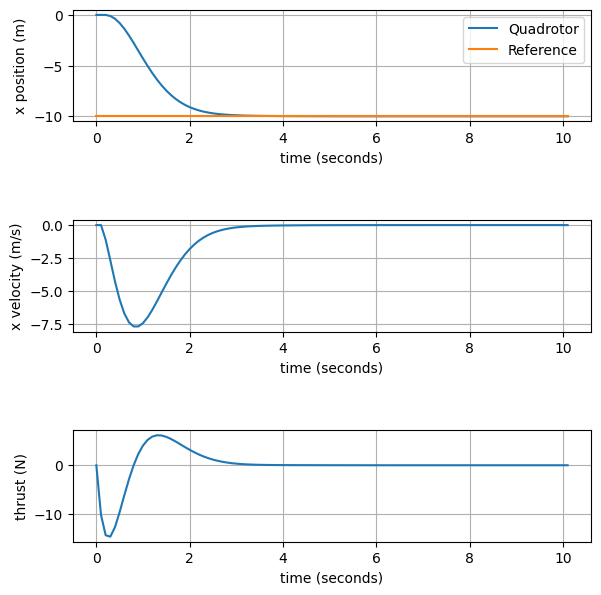

In [11]:
# setting up the numerical solution parameters
g = 9.8 #Gravity (m/s^2)
m = 0.65 #Mass (kg)
I = 0.013 #Moment of Intertia (nm/s)

y_0 = 0 # meters
ydot_0 = 0 # meters/second

x_0 = 0
xdot_0 = 0

theta_0 = 0
thetadot_0 = 0

thrust_max = 50

dt = 0.1

thrust_0 = 0
torque_0 = 0

x_d = -10

t_0 = 0

model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

# define the states
x_pos = model.set_variable(var_type='_x', var_name='x_pos', shape=(1,1))
x_vel = model.set_variable(var_type='_x', var_name='x_vel', shape = (1,1))
thrust = model.set_variable(var_type='_u', var_name = 'thrust')

# include the dynamics in the model
model.set_rhs('x_vel', ((-1*(math.sin(-math.pi/4) * thrust) / m) * dt + x_vel))
model.set_rhs("x_pos", x_vel * dt + x_pos)


# setup the control goals
# weights for the cost functions
     

# avoid large force (let's say we want to minimize energy consumption)
model.set_expression(
        expr_name="lagrange_term", expr = 0.00001 * thrust**2
)
# reach the final destinatioin (x_d)
model.set_expression(
    expr_name="meyer_term", expr= 200*(x_d - x_pos) ** 2 + 200*x_vel**2
)
# finish the setup
model.setup()
print('Model defined!')

# define the MPC solver
mpc = do_mpc.controller.MPC(model)
mpc.settings.n_horizon = 5 # predict the next N steps
mpc.settings.t_step = dt # sample time

# add the control goals to the solver
lterm = model.aux["lagrange_term"]
mterm = model.aux["meyer_term"]
mpc.set_objective(lterm=lterm, mterm=mterm)

# for smoothing the inputs
mpc.set_rterm(thrust = 5) 
mpc.scaling['_x', 'x_pos'] = 1
mpc.scaling['_x', 'x_vel'] = 10

# lower and upper bounds for the input
mpc.bounds["lower", "_u", "thrust"] = -thrust_max
mpc.bounds["upper", "_u", "thrust"] = thrust_max

# supress the calculation outputs!
surpress_ipopt = {'ipopt.print_level':0, 'ipopt.sb': 'yes', 'print_time':0}
mpc.set_param(nlpsol_opts = surpress_ipopt)

# finish the setup
mpc.setup()
print('MPC solver defined!')

# initialize the independent and dependent variable lists
time_values = np.array([[t_0]])
x_values = np.array([[x_0]])
ref_values = np.array([[x_d]])
u1_values = np.array([[thrust_0]])
u2_values = np.array([[torque_0]])
vel_values = np.array([[xdot_0]])

# initialize the solver
s_k = np.array([[x_0, xdot_0]]).T
s_k1 = np.array([[0, 0, 0 ,0]]).T
t = t_0
t_f = 10

# simulate the dynamics
while t < t_f:    
    # TODO: calculate v_k for the current step
    # set up the solver for the current iteration
    mpc.x0 = s_k # where we start
    mpc.set_initial_guess() # some initial guess
    u_opt = mpc.make_step(s_k) # solve the optimal control problem
    u_k = u_opt[0][0] # extract the first optimal input and apply it

    s_k1 = np.array([[(s_k[1][0])*dt + s_k[0][0], (-1*(math.sin(-math.pi/4)*u_k) / m)*dt + s_k[1][0]]]).T
    
    # update the simulation time stamp
    t += dt
    
    # update the lists
    x_values = np.append(x_values, np.array([[s_k[0][0]]]),axis = 0)
    ref_values = np.append(ref_values, np.array([[x_d]]),axis = 0)
    u1_values = np.append(u1_values, np.array([[u_k]]),axis = 0)
    
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    vel_values = np.append(vel_values, np.array([[s_k[1][0]]]), axis = 0)
                                                 
    # set up the loop for the next iteration
    s_k = np.array([[s_k1[0][0], s_k1[1][0]]]).T                         
                                                 
# DO NOT CHANGE THE FOLLOWING
# estimate the steady-state error
e_ss = x_d - s_k[0][0]
print('x steady-state error (m):',e_ss)

# create some subplots and display the results
fig, axs = plt.subplots(3, 1,figsize=(7,7))

# plot the first state vs time
fig.tight_layout(pad=5.0)

# plot the x position vs time
axs[0].plot(time_values, x_values)
axs[0].plot(time_values, ref_values)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x position (m)')
axs[0].grid()   
axs[0].legend(['Quadrotor', 'Reference'])

# plot the x velocity vs time
axs[1].plot(time_values, vel_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x velocity (m/s)')
axs[1].grid()

# plot the input vs time
axs[2].plot(time_values, u1_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('thrust (N)')
axs[2].grid()

## **Discussion and Conclusion**

**This is a viable model to simulate the movement of a quadrotor using various inputs and parameters with the absence of air drag. It allows us to depict the motion of the drone at various states. However, the absence of air drag makes it difficult to simulate real world behavior. Based on the simulation, we can conclude that 1: the quadrotor has no horizontal movement when no torque is applied to the system, 2: The drone is at equilibrium and hovers when the thrust force is at 6.37 Newtons, 3: Torque won’t affect the position of the quadrotor with the absence of thrust. Some further implications are incorporating air drag to produce more realistic results and adding 3D motion by implementing an x,y,z position dynamic model.**


**We then used Model Predictive Control and PID controllers to control the behavior of the drone by finding the optimal inputs to reach a desired position. Before, we could only observe the behavior of the quadrotor, but by implementing controllers we could now manipulate the quadrotor's inputs to behave the way we want it to. It was extremely difficult to make everything connected since changing one input would completely alter the states. Some further implications could be using a single PID controller to control the thrust and torque and simulate the movement of the quadrotor to a desired (x,y) coordinate. This is applicable to the MPC as well.**